In [1]:
#Step 1
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Step 2
#import libraries
import pandas as pd 
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from tensorflow import keras

In [3]:
#Step 3
#Loading the  datasets
stock_price_df = pd.read_csv('/content/drive/My Drive/price_stock.csv')
stock_price_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [4]:
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [5]:
#checking for null values in price_stock dataset
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [6]:
#checking for data types in the dateset
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [7]:
# import the volume_stock datasets
stock_vol_df = pd.read_csv('/content/drive/My Drive/volume_stock.csv')
stock_vol_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000


In [8]:
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [9]:
#checking for null values in volume_stock dataset
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [10]:
#checking for datatypes in the dataset
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [11]:
#Step 4
#Data visualizatioin  of the datasets
def show_plot(stock_price_df, fig_title):
  stock_price_df.plot(x = 'Date',figsize =(15,7),linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

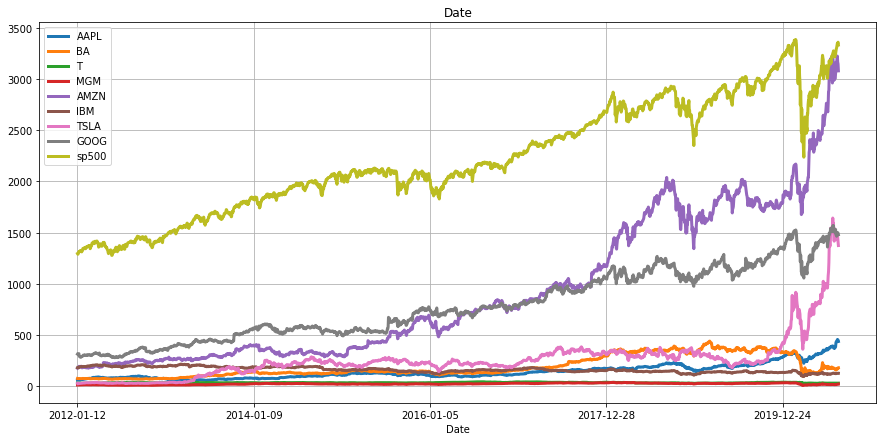

In [12]:
show_plot(stock_price_df,'Date')

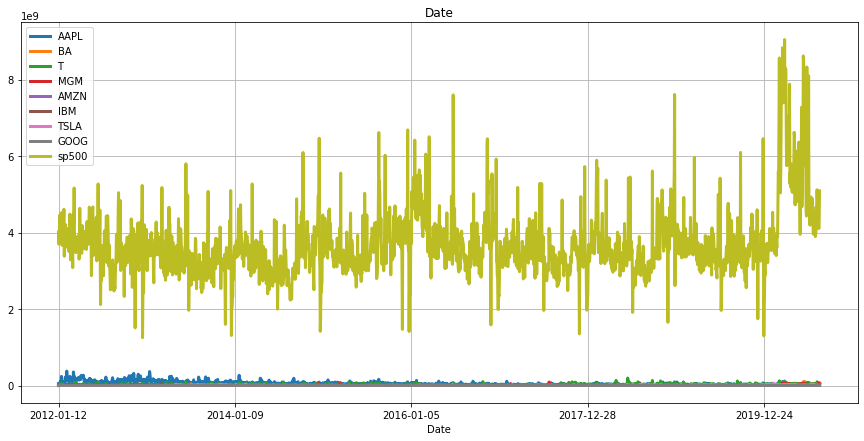

In [13]:
#Data visualizatioin  of stock_volume dataset
def show_plot(stock_vol_df, fig_title):
  stock_vol_df.plot(x = 'Date',figsize =(15,7),linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()
show_plot(stock_vol_df,'Date')

In [14]:
# Visulazation of  datasets using plotly.express
# This offers a more graphical interpretation of the variables 
def show_data(df, fig_title):
  fig = px.line(title = fig_title)
  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'],y =df[i], name =i)
  fig.show()
show_data(stock_price_df,"price")

In [15]:
# Visualization of stock_volume dateset using plotly.express
# This offers a more graphical interpretation of the variables 
def show_data(df, fig_title):
  fig = px.line(title = fig_title)
  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'],y =df[i], name =i)
  fig.show()
show_data(stock_vol_df,"volume")

In [16]:
#Step 5
#construct the data for training the AI model
def individual_stock(stock_price_df,stock_vol_df,name):
  return pd.DataFrame({'Date':stock_price_df['Date'],'close':stock_price_df[name],'volume':stock_vol_df[name]})

In [17]:
def trading_window(data):
  n=1
  data['Target'] = data[['close']].shift(-n)
  return data

In [18]:
#Step 6
#choosing a specific column: GOOGLE(GOOG)
price_volume_df =individual_stock(stock_price_df,stock_vol_df,'GOOG')

In [19]:
price_volume_df

,Date,close,volume
0,2012-01-12,313.644379,3764400
1,2012-01-13,311.328064,4631800
2,2012-01-17,313.116364,3832800
3,2012-01-18,315.273285,5544000
4,2012-01-19,318.590851,12657800
...,...,...,...
2154,2020-08-05,1473.609985,1979500
2155,2020-08-06,1500.099976,1995400
2156,2020-08-07,1494.489990,1576600
2157,2020-08-10,1496.099976,1289300


In [20]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,Date,close,volume,Target
0,2012-01-12,313.644379,3764400,311.328064
1,2012-01-13,311.328064,4631800,313.116364
2,2012-01-17,313.116364,3832800,315.273285
3,2012-01-18,315.273285,5544000,318.590851
4,2012-01-19,318.590851,12657800,291.900879
...,...,...,...,...
2154,2020-08-05,1473.609985,1979500,1500.099976
2155,2020-08-06,1500.099976,1995400,1494.489990
2156,2020-08-07,1494.489990,1576600,1496.099976
2157,2020-08-10,1496.099976,1289300,1480.319946


In [21]:
price_volume_target_df =price_volume_df[:-1]
price_volume_target_df

,Date,close,volume,Target
0,2012-01-12,313.644379,3764400,311.328064
1,2012-01-13,311.328064,4631800,313.116364
2,2012-01-17,313.116364,3832800,315.273285
3,2012-01-18,315.273285,5544000,318.590851
4,2012-01-19,318.590851,12657800,291.900879
...,...,...,...,...
2153,2020-08-04,1464.969971,1903500,1473.609985
2154,2020-08-05,1473.609985,1979500,1500.099976
2155,2020-08-06,1500.099976,1995400,1494.489990
2156,2020-08-07,1494.489990,1576600,1496.099976


In [22]:
#Step 7
#standardizing the dataset
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [23]:
price_volume_target_df_sc = sc.fit_transform(price_volume_target_df.drop(columns=['Date']))
price_volume_target_df_sc


array([[0.02725811, 0.15044053, 0.02546253],
       [0.02546253, 0.18517821, 0.0268488 ],
       [0.0268488 , 0.15317982, 0.02852082],
       ...,
       [0.94698485, 0.07959551, 0.94263605],
       [0.94263605, 0.06282339, 0.94388409],
       [0.94388409, 0.05131758, 0.9316516 ]])

In [24]:
#dividing the dateset into dependent and independent variables
X = price_volume_target_df_sc[:,:2]
y = price_volume_target_df_sc[:,2:]

In [25]:
X

array([[0.02725811, 0.15044053],
       [0.02546253, 0.18517821],
       [0.0268488 , 0.15317982],
       ...,
       [0.94698485, 0.07959551],
       [0.94263605, 0.06282339],
       [0.94388409, 0.05131758]])

In [26]:
y

array([[0.02546253],
       [0.0268488 ],
       [0.02852082],
       ...,
       [0.94263605],
       [0.94388409],
       [0.9316516 ]])

In [27]:
#Step 9
#splitting the dataset into train and test sets in our case in the of(0.7:0.3) respectively 
AI_model = int(0.70*len(X))
X_train = X[:AI_model]
y_train = y[:AI_model]
X_test = X[AI_model:]
y_test = y[AI_model:]

In [28]:
len(X_test)

648

In [29]:
len(X_train)

1510

In [30]:
#fitting the model
from sklearn.linear_model import Ridge
ai_model = Ridge()

In [31]:
ai_model.fit(X_train,y_train)

Ridge()

In [32]:
predicted_prices = ai_model.predict(X)
predicted_prices

array([[0.03419731],
       [0.03130399],
       [0.03371072],
       ...,
       [0.9244123 ],
       [0.9207743 ],
       [0.92236329]])

In [33]:
#Step10
# accuracy score for training  set
train_score = ai_model.score(X_train, y_train)
print("Accuracy score on the training set: {:.4f}".format(train_score))

Accuracy score on the training set: 0.9975


In [34]:
#Step11
# accuracy score for testing set
test_score = ai_model.score(X_test, y_test)
print("Accuracy score on the testing set: {:.4f}".format(test_score))

Accuracy score on the testing set: 0.9516


In [35]:
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [36]:
len(Predicted)

2158

In [37]:
close = []
for i in price_volume_target_df_sc:
  close.append(i[0])

In [38]:
len(close)

2158

In [39]:
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [40]:
df_predicted['close'] = close
df_predicted

,Date,close
0,2012-01-12,0.027258
1,2012-01-13,0.025463
2,2012-01-17,0.026849
3,2012-01-18,0.028521
4,2012-01-19,0.031093
...,...,...
2153,2020-08-04,0.919752
2154,2020-08-05,0.926450
2155,2020-08-06,0.946985
2156,2020-08-07,0.942636


In [41]:
df_predicted['Prediction'] =Predicted
df_predicted

,Date,close,Prediction
0,2012-01-12,0.027258,0.034197
1,2012-01-13,0.025463,0.031304
2,2012-01-17,0.026849,0.033711
3,2012-01-18,0.028521,0.033036
4,2012-01-19,0.031093,0.026006
...,...,...,...
2153,2020-08-04,0.919752,0.898247
2154,2020-08-05,0.926450,0.904611
2155,2020-08-06,0.946985,0.924412
2156,2020-08-07,0.942636,0.920774


In [42]:
#Step12
def interactive_plot(df,title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x= df['Date'],y =df[i],name =i)
  fig.show()

In [43]:
interactive_plot(df_predicted,'closing predicted prices vs time(years)')
